In [1]:
# import required packages
import numpy as np
import pandas as pd
import scipy.linalg
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Generate a date range
dates = pd.date_range(start='2010-01-01', periods=120, freq='M')
print(dates)

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=120, freq='ME')


C:\Users\tamma\AppData\Local\Temp\ipykernel_17976\1281326267.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2010-01-01', periods=120, freq='M')


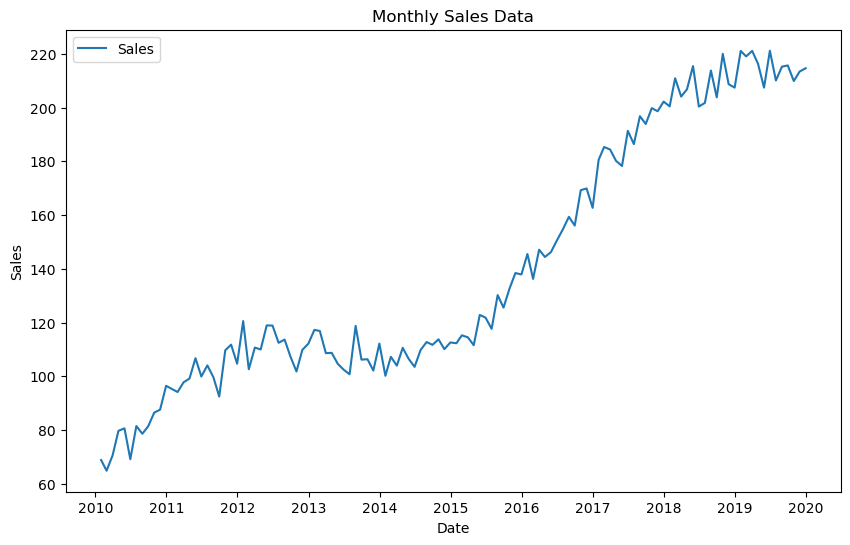

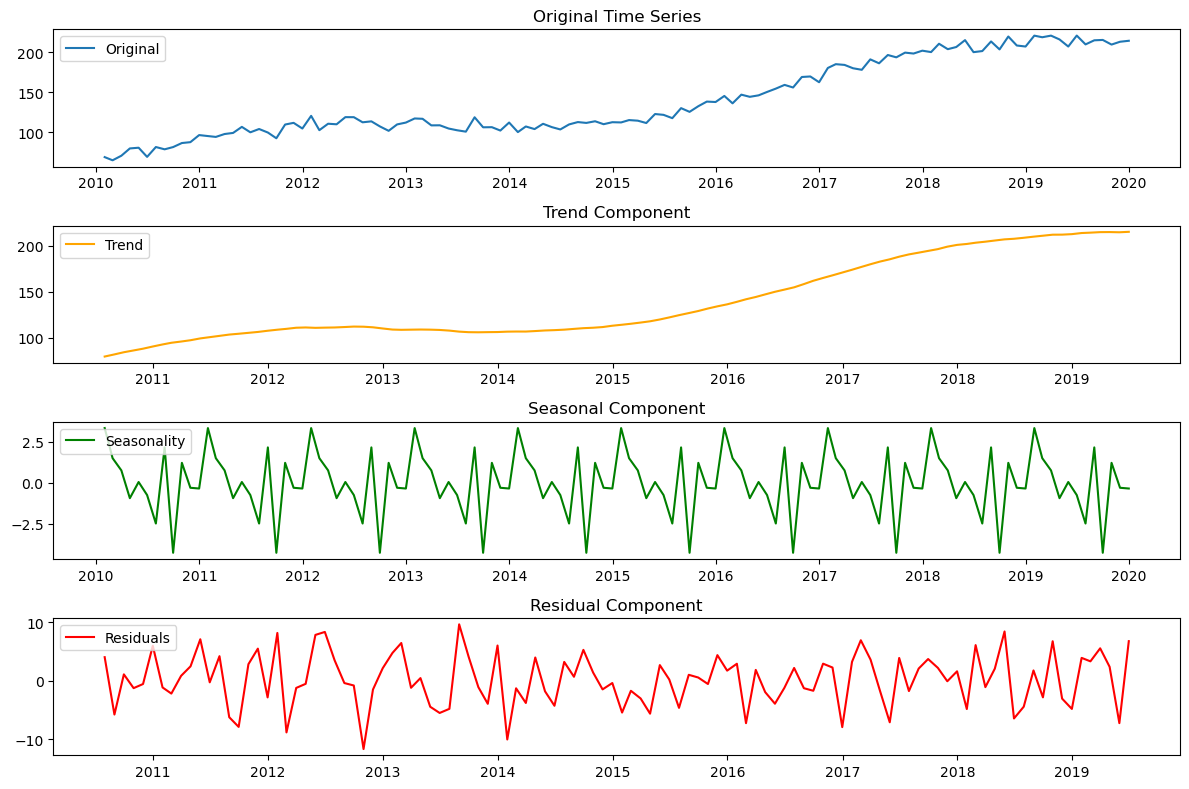

In [5]:
# Generate synthetic sales data
np.random.seed(0)
trend = np.linspace(50, 200, 120)  # Linear trend
seasonal = 10 + 20 * np.sin(np.linspace(0, 3 * np.pi, 120))  # Seasonal component
noise = np.random.normal(0, 5, 120)  # Random noise
sales = trend + seasonal + noise

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Sales': sales})
data.set_index('Date', inplace=True)

# Visualize the Time Series
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Sales')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(data['Sales'], model='additive', period=12)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot and Analyze the Components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(data['Sales'], label='Original')
plt.title('Original Time Series')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual, label='Residuals', color='red')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# IN LAB 2 - ARIMA MODEL

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [9]:
# Generate a date range
dates = pd.date_range(start='2010-01-01', periods=120, freq='M')
print(dates)

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2019-03-31', '2019-04-30', '2019-05-31', '2019-06-30',
               '2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', length=120, freq='ME')


C:\Users\tamma\AppData\Local\Temp\ipykernel_17976\1281326267.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2010-01-01', periods=120, freq='M')


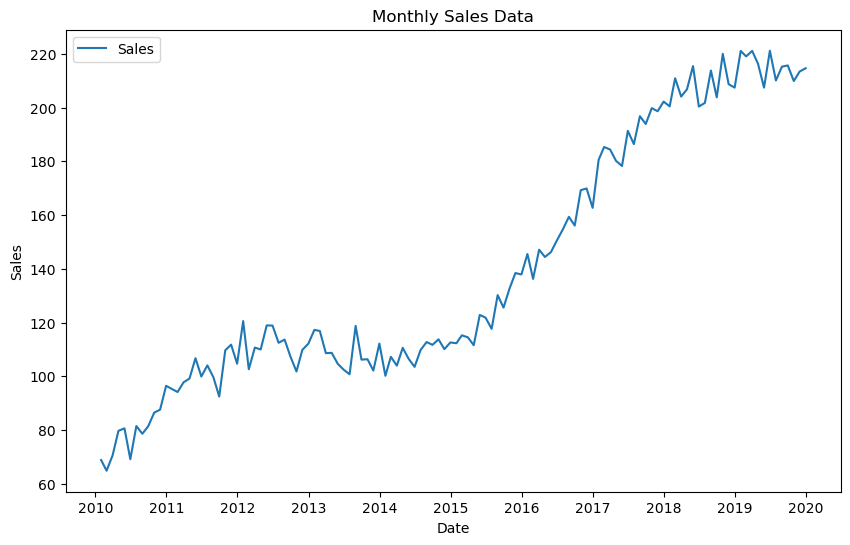

In [11]:
# Generate synthetic sales data
np.random.seed(0)
trend = np.linspace(50, 200, 120)  # Linear trend
seasonal = 10 + 20 * np.sin(np.linspace(0, 3 * np.pi, 120))  # Seasonal component
noise = np.random.normal(0, 5, 120)  # Random noise
sales = trend + seasonal + noise

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'Sales': sales})
data.set_index('Date', inplace=True)

# Visualize the Time Series
plt.figure(figsize=(10, 6))
plt.plot(data['Sales'], label='Sales')
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

E:\3yr_Odd_sem\DAV\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
E:\3yr_Odd_sem\DAV\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
E:\3yr_Odd_sem\DAV\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  120
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -392.256
Date:                Mon, 19 Aug 2024   AIC                            790.512
Time:                        14:01:41   BIC                            798.849
Sample:                    01-31-2010   HQIC                           793.897
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3211      0.189     -1.700      0.089      -0.691       0.049
ma.L1         -0.1899      0.200     -0.950      0.342      -0.582       0.202
sigma2        42.6250      6.512      6.545      0.0

C:\Users\tamma\AppData\Local\Temp\ipykernel_17976\3944202818.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]


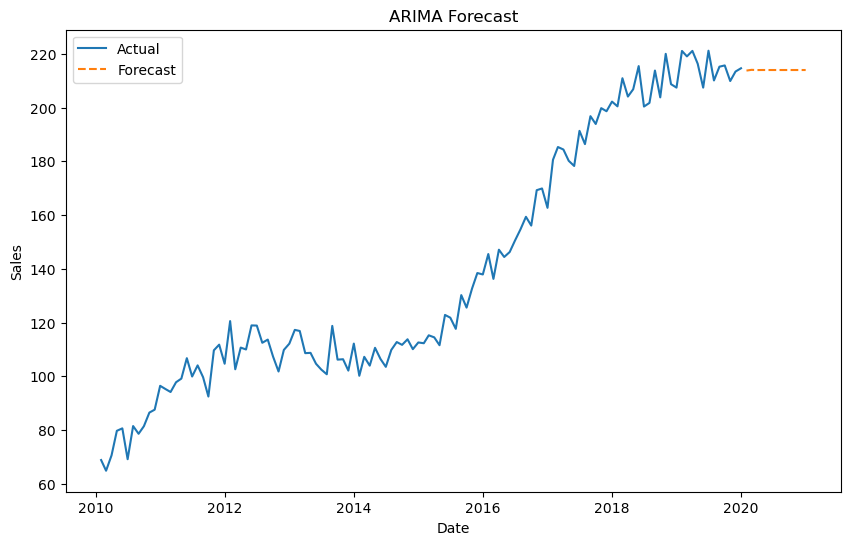

In [13]:
# Fit ARIMA model
model = ARIMA(data['Sales'], order=(1, 1, 1))  # Example order parameters (p, d, q)
arima_results = model.fit()

# Print model summary
print(arima_results.summary())

# Forecast future values
forecast_steps = 12  # Number of steps ahead to forecast
forecast = arima_results.forecast(steps=forecast_steps)

# Create date range for forecasts
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plot the original data and forecasts
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Sales'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast', linestyle='--')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
